In [4]:
import os
import tempfile
import git
import matplotlib.pyplot as plt
import numpy as np
import random
import git.exc

import pyabc
from pyabc import ABCSMC, Distribution, RV

pyabc.settings.set_figure_params('pyabc')

def simulate_fixvq_log(parameters):
    
    v = 0.001
    s = 10**parameters['s']

    print("Testing parameter set:", s)
    q = 0.001

    r = s1 = s2 = s3 = s
    d = d1 = d2 = d3 = s/100
    v1 = v2 = v
    t = 0
    t_list = [t]
    x = 1
    y1 = 0
    y2 = 0
    x_list = [1]
    y1_list = [0]
    y2_list = [0]
    zcell_list = [0]
    z_list = []
    z_array = np.array(z_list)
    total = 1
    total_list = [total]
    treatment = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < 1000000:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        total_list.append(total)
        t_list.append(t)
        x_list.append(x)
        y1_list.append(y1)
        y2_list.append(y2)
        zcell_list.append(sum(np.array(z_list)))
        
        if total >= 250000 and treatment==False:
            t_diag = t
            treatment = True
        
    return {"survival_time": t-t_diag}

def simulate_fixvq(parameters):
    
    v = 0.001
    s = parameters['s']
    print("Testing parameter set:", parameters['s'])
    q = 0.001

    r = s1 = s2 = s3 = s
    d = d1 = d2 = d3 = s/100
    v1 = v2 = v
    t = 0
    t_list = [t]
    x = 1
    y1 = 0
    y2 = 0
    x_list = [1]
    y1_list = [0]
    y2_list = [0]
    zcell_list = [0]
    z_list = []
    z_array = np.array(z_list)
    total = 1
    total_list = [total]
    treatment = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < 1000000:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        total_list.append(total)
        t_list.append(t)
        x_list.append(x)
        y1_list.append(y1)
        y2_list.append(y2)
        zcell_list.append(sum(np.array(z_list)))
        
        if total >= 250000 and treatment==False:
            t_diag = t
            treatment = True
        
    return {"survival_time": t-t_diag}

def simulate_log(parameters):
    
    v = 10**parameters['v']
    s = 10**parameters['s']
    q = 10**parameters['q']
    print("Testing parameter set:", s, v, q)

    r = s1 = s2 = s3 = s
    d = d1 = d2 = d3 = s/100
    v1 = v2 = v
    t = 0
    t_list = [t]
    x = 1
    y1 = 0
    y2 = 0
    x_list = [1]
    y1_list = [0]
    y2_list = [0]
    zcell_list = [0]
    z_list = []
    z_array = np.array(z_list)
    total = 1
    total_list = [total]
    treatment = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < 1000000:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        total_list.append(total)
        t_list.append(t)
        x_list.append(x)
        y1_list.append(y1)
        y2_list.append(y2)
        zcell_list.append(sum(np.array(z_list)))
        
        if total >= 250000 and treatment==False:
            t_diag = t
            treatment = True
        
    return {"survival_time": t-t_diag}


In [5]:
def simulate_fixvq(parameters):
    
    v = 0.001
    s = parameters['s']
    q = 0.001

    r = s1 = s2 = s3 = s
    d = d1 = d2 = d3 = s/100
    v1 = v2 = v
    t = 0
    t_list = [t]
    x = 1
    y1 = 0
    y2 = 0
    x_list = [1]
    y1_list = [0]
    y2_list = [0]
    zcell_list = [0]
    z_list = []
    z_array = np.array(z_list)
    total = 1
    total_list = [total]
    treatment = False
    t_diag = 0
    
    #run the simulation until the size of the population or time reaches the limit
    while 0 < total < 1000000:
        
        #Gamma is the sum of the rates of all possible events
        Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
        tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution
            
        if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
            x += 1
        if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
            y1 += 1
        if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
            y2 += 1
        if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
            y2 -= 1
            z_list.append(1) #define a new metastatic site
            
        if random.random() < x*d / Gamma: #type0 cell death rate
            x -= 1
        if random.random() < y1*d1 / Gamma: #type1 cell death rate
            y1 -= 1
        if random.random() < y2*d2 / Gamma:#type2 cell death rate
            y2 -= 1
        
        #division and death rates for each metastatic site
        for n in range(len(z_list)):
            if random.random() < z_list[n]*s3 / Gamma:
                z_list[n] += 1
            if random.random() < z_list[n]*d3 / Gamma:
                z_list[n] -= 1
        
        t += tau
        z_array = np.array(z_list)
        total = x + y1 + y2 + sum(z_array)
        total_list.append(total)
        t_list.append(t)
        x_list.append(x)
        y1_list.append(y1)
        y2_list.append(y2)
        zcell_list.append(sum(np.array(z_list)))
        
        if total >= 250000 and treatment==False:
            t_diag = t
            treatment = True
        
    return {"survival_time": t-t_diag}

n = 10
def simulate_fixvq_multi(parameters):
    survival_time_list = []
    print("Testing parameter set:", parameters['s'])
    
    for n in range(5):
        
        s = parameters['s']
        v = 0.001
        q = 0.001
        r = s1 = s2 = s3 = s
        d = d1 = d2 = d3 = s/100
        v1 = v2 = v
        t = 0
        t_list = [t]
        x = 1
        y1 = 0
        y2 = 0
        x_list = [1]
        y1_list = [0]
        y2_list = [0]
        zcell_list = [0]
        z_list = []
        z_array = np.array(z_list)
        total = 1
        total_list = [total]
        treatment = False
        t_diag = 0
    

    #run the simulation until the size of the population or time reaches the limit
        while 0 < total < 1000000:

            #Gamma is the sum of the rates of all possible events
            Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
            tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution

            if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
                x += 1
            if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
                y1 += 1
            if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
                y2 += 1
            if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
                y2 -= 1
                z_list.append(1) #define a new metastatic site

            if random.random() < x*d / Gamma: #type0 cell death rate
                x -= 1
            if random.random() < y1*d1 / Gamma: #type1 cell death rate
                y1 -= 1
            if random.random() < y2*d2 / Gamma:#type2 cell death rate
                y2 -= 1

            #division and death rates for each metastatic site
            for n in range(len(z_list)):
                if random.random() < z_list[n]*s3 / Gamma:
                    z_list[n] += 1
                if random.random() < z_list[n]*d3 / Gamma:
                    z_list[n] -= 1

            t += tau
            z_array = np.array(z_list)
            total = x + y1 + y2 + sum(z_array)
            total_list.append(total)
            t_list.append(t)
            x_list.append(x)
            y1_list.append(y1)
            y2_list.append(y2)
            zcell_list.append(sum(np.array(z_list)))

            if total >= 250000 and treatment==False:
                t_diag = t
                treatment = True
        survival_time_list.append(t-t_diag)
        
    return {"survival_time": survival_time_list}

def simulate_fixvq_multi50(parameters):
    survival_time_list = []
    print("Testing parameter set:", parameters['s'])
    
    for n in range(50):
        
        s = parameters['s']
        v = 0.001
        q = 0.001
        r = s1 = s2 = s3 = s
        d = d1 = d2 = d3 = s/100
        v1 = v2 = v
        t = 0
        t_list = [t]
        x = 1
        y1 = 0
        y2 = 0
        x_list = [1]
        y1_list = [0]
        y2_list = [0]
        zcell_list = [0]
        z_list = []
        z_array = np.array(z_list)
        total = 1
        total_list = [total]
        treatment = False
        t_diag = 0
    

    #run the simulation until the size of the population or time reaches the limit
        while 0 < total < 1000000:

            #Gamma is the sum of the rates of all possible events
            Gamma = (r+d)*x + (s1+d1)*y1 + (s2+d2+q)*y2 + (s3+d3)*sum(z_array)
            tau = np.random.exponential(1/Gamma) #find the next time using an eponential distribution

            if random.random() < x*r*(1-v1) / Gamma: #type0 cell division rate
                x += 1
            if random.random() < ((x*r*v1) + y1*s1*(1-v2)) / Gamma: #type0 cell mutation or type1 cell division
                y1 += 1
            if random.random() < (y1*s1*v2 + y2*s2) / Gamma: #type1 cell mutation or type2 cell division
                y2 += 1
            if random.random() < y2*q / Gamma:  #type2 cell exports to new metastatic site
                y2 -= 1
                z_list.append(1) #define a new metastatic site

            if random.random() < x*d / Gamma: #type0 cell death rate
                x -= 1
            if random.random() < y1*d1 / Gamma: #type1 cell death rate
                y1 -= 1
            if random.random() < y2*d2 / Gamma:#type2 cell death rate
                y2 -= 1

            #division and death rates for each metastatic site
            for n in range(len(z_list)):
                if random.random() < z_list[n]*s3 / Gamma:
                    z_list[n] += 1
                if random.random() < z_list[n]*d3 / Gamma:
                    z_list[n] -= 1

            t += tau
            z_array = np.array(z_list)
            total = x + y1 + y2 + sum(z_array)
            total_list.append(total)
            t_list.append(t)
            x_list.append(x)
            y1_list.append(y1)
            y2_list.append(y2)
            zcell_list.append(sum(np.array(z_list)))

            if total >= 250000 and treatment==False:
                t_diag = t
                treatment = True
        survival_time_list.append(t-t_diag)
        
    return {"survival_time": survival_time_list}


In [2]:
observe_data = []
for n in range(50):
    observe = simulate_fixvq({'s':0.11})['survival_time']
    print(observe)
    observe_data.append(observe)

observe_11 = np.mean(observe_data)

Testing parameter set: 0.11
12.718391729291099
Testing parameter set: 0.11
12.729078048360407
Testing parameter set: 0.11
12.710329630875108
Testing parameter set: 0.11
12.739273194590623
Testing parameter set: 0.11
12.735254617296391
Testing parameter set: 0.11
12.738513838156663
Testing parameter set: 0.11
12.707095743127041
Testing parameter set: 0.11
12.736450399526348
Testing parameter set: 0.11
12.739331015506096
Testing parameter set: 0.11
12.733258488287333
Testing parameter set: 0.11
12.740146220224801
Testing parameter set: 0.11
12.740994175081141
Testing parameter set: 0.11
12.724062835793973
Testing parameter set: 0.11
12.733425885324579
Testing parameter set: 0.11
12.73040670489749
Testing parameter set: 0.11
12.736074934047267
Testing parameter set: 0.11
12.714783550768175
Testing parameter set: 0.11
12.738368585059234
Testing parameter set: 0.11
12.743857431960905
Testing parameter set: 0.11
12.7645071705971
Testing parameter set: 0.11
12.745273231602098
Testing paramete

In [3]:
observe_data = []
for n in range(50):
    observe = simulate_fixvq({'s':0.21})['survival_time']
    print(observe)
    observe_data.append(observe)

observe_21 = np.mean(observe_data)

Testing parameter set: 0.21
6.675712874119817
Testing parameter set: 0.21
6.668722901554702
Testing parameter set: 0.21
6.67162236180954
Testing parameter set: 0.21
6.655629812232405
Testing parameter set: 0.21
6.6758921595638725
Testing parameter set: 0.21
6.668913794135705
Testing parameter set: 0.21
6.664453215648891
Testing parameter set: 0.21
6.658401494167521
Testing parameter set: 0.21
6.657727486570536
Testing parameter set: 0.21
6.656820396935267
Testing parameter set: 0.21
6.668051890536809
Testing parameter set: 0.21
6.673753267158666
Testing parameter set: 0.21
6.668408685163726
Testing parameter set: 0.21
6.655263148444462
Testing parameter set: 0.21
6.670967434151834
Testing parameter set: 0.21
6.681223846246979
Testing parameter set: 0.21
6.67674496753591
Testing parameter set: 0.21
6.667470532531581
Testing parameter set: 0.21
6.659866043589695
Testing parameter set: 0.21
6.666657059913739
Testing parameter set: 0.21
6.662946553949141
Testing parameter set: 0.21
6.66912

In [4]:
observe_data = []
for n in range(50):
    observe = simulate_fixvq({'s':0.31})['survival_time']
    print(observe)
    observe_data.append(observe)

observe_31 = np.mean(observe_data)

Testing parameter set: 0.31
4.520757856042351
Testing parameter set: 0.31
4.525403904651931
Testing parameter set: 0.31
4.517065003979496
Testing parameter set: 0.31
4.526473876823623
Testing parameter set: 0.31
4.507687244044007
Testing parameter set: 0.31
4.520036240755438
Testing parameter set: 0.31
4.515177481802226
Testing parameter set: 0.31
4.524166119776531
Testing parameter set: 0.31
4.517860008160994
Testing parameter set: 0.31
4.5107502433397215
Testing parameter set: 0.31
4.505912347512741
Testing parameter set: 0.31
4.517690399073899
Testing parameter set: 0.31
4.514519160148204
Testing parameter set: 0.31
4.515732207956852
Testing parameter set: 0.31
4.515289020466476
Testing parameter set: 0.31
4.513533076590363
Testing parameter set: 0.31
4.5290750089209055
Testing parameter set: 0.31
4.507791375393403
Testing parameter set: 0.31
4.518357228950904
Testing parameter set: 0.31
4.524460510478725
Testing parameter set: 0.31
4.515927283786631
Testing parameter set: 0.31
4.50

In [5]:
parameter_priors = Distribution(  # Example: Uniform distribution between 0 and 0.1
    s=RV("uniform", np.log10(0.00001), 5),  # Example: Uniform distribution between 0 and 2
    )
parameter_priors
observed_data = {'survival_time': observe_11}

def squared_difference_distance(simulation, observed_data):
    simulated_time_point = simulation['survival_time']
    observed_time_point = observed_data['survival_time']
    
    # Calculate the squared difference
    distance = (simulated_time_point - observed_time_point) ** 2

    print(simulation['survival_time'], distance)
    return distance

abc = pyabc.ABCSMC(simulate_fixvq_log,
             parameter_priors=parameter_priors,
             distance_function=squared_difference_distance,
             population_size=100)

db_path = "sqlite:///my_abc.db"
history_g11_log = abc.new(db_path, observed_data)
history_g11_log = abc.run(minimum_epsilon=0.1, max_nr_populations=10)


ABC.Sampler INFO: Parallelize sampling on 56 processes.
ABC.History INFO: Start <ABCSMC id=16, start_time=2024-06-08 02:59:28>
ABC INFO: Calibration sample t = -1.


Testing parameter set: 2.1600055811029473e-05
Testing parameter set: 0.0177242685460381Testing parameter set: 
0.000668303209160587
Testing parameter set: 0.1790947174977392
Testing parameter set: 0.16631293309400066
Testing parameter set: 0.000501725764289744
Testing parameter set: 9.591486094052466e-05
Testing parameter set: 0.23028633926620434
Testing parameter set: 0.020015103649431293
Testing parameter set: 0.6403271385754046Testing parameter set:
 0.0015257757441871375
Testing parameter set: 0.03466779673352029
Testing parameter set: 0.17509967696278425
Testing parameter set: 3.537796854986088e-05Testing parameter set:
 1.4344272326131933e-05
Testing parameter set: 0.0013462626829493954
Testing parameter set: Testing parameter set:0.002379940277320324
 0.8234200612770386Testing parameter set:
 0.004978511494354911
Testing parameter set: 0.0006657655679614481
Testing parameter set: 0.0003419734319049069
Testing parameter set: 0.000210172581991222
Testing parameter set: 0.002094932

ABC INFO: t: 0, eps: 2.58906222e+05.


64910.50711378106 4211721272.015539
79.02653346777777 4395.0236977075565
2098.963289183008 4352362.833848347
7.8198137564931045 24.125237038139325
8.385491815635362 18.888296167143974
2792.6416892205234 7727900.334535786
14565.359785682755 211778988.31678075
6.07586875945465 44.298206752740676
70.0289601242464 3282.992225741975
2.1871692919491394 111.18414508633974
919.0330679474719 821382.4259136989
40.364605229496135 763.585268107117
7.989852969367362 22.483771930790365
39556.254356853664 1563690195.2989826
97551.435605963 9513798787.246407
1040.3004515697594 1055897.8298764147
588.2160866318727 331182.44204736874
1.701208662451517 121.66861891481284
281.63044766199573 72306.6125590084
2100.836971341436 4360184.214877198
4087.272621004726 16601884.869528815
6665.497383481234 44259293.12120826
667.7707138727455 429076.29498971946
33.00571290854515 411.04133445219975
12.211413374608313 0.2705510163601831
127309.62627286697 16204499403.904749
66.5035461426288 2891.426648330624
87855.993

ABC INFO: Accepted: 100 / 249 = 4.0161e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 1.82981463e+02.


Testing parameter set: Testing parameter set:0.3508356384593471 
0.013293117333942903
Testing parameter set:Testing parameter set:  0.52262560522323940.45309786586534656Testing parameter set:

 0.6587499248976917
Testing parameter set: Testing parameter set:0.031712878610496334 
0.008395063309331905
Testing parameter set: 0.005015141212526093Testing parameter set:Testing parameter set:
  0.151538246764139820.15943501815117359

Testing parameter set:Testing parameter set:  0.0067102730614267840.005018252277913374
Testing parameter set:
 Testing parameter set:0.08558221692989813
 0.021838394448260193Testing parameter set:
 0.5915992797660186
Testing parameter set: 0.010494470435195066
Testing parameter set: 0.27716639943827703
Testing parameter set: 0.3428150265185739
Testing parameter set: 0.003655830587823373
Testing parameter set: 0.05446076381248634
Testing parameter set: 0.09812714807118593
Testing parameter set: 0.122798545723224
Testing parameter set: 0.7401921644495286
Testing pa

ABC INFO: Accepted: 100 / 261 = 3.8314e-01, ESS: 9.9322e+01.
ABC INFO: t: 2, eps: 7.23503682e+01.


Testing parameter set: 0.0842864237016648Testing parameter set:
 0.11065363899439853
Testing parameter set:Testing parameter set:  0.39401577952617480.7315275983063265

Testing parameter set: Testing parameter set:0.11053339861751249 
0.19501132658324238Testing parameter set:
 Testing parameter set:0.4037315449994453 
0.3583902140297575
Testing parameter set: Testing parameter set:0.12380758252536521 
0.03402019755321441Testing parameter set:
 0.29983534051153704Testing parameter set:
 0.0433923206262249Testing parameter set:
 0.5297592449556607Testing parameter set:
 0.21554487161041416Testing parameter set:
 0.134969786297726
Testing parameter set: 0.7401092737852103Testing parameter set:
 0.19246355871909454
Testing parameter set: 0.22724447480667204
Testing parameter set: 0.3793076620146196
Testing parameter set: 0.6607157464625932Testing parameter set:
 0.208514827473261
Testing parameter set: 0.8548438969804992
Testing parameter set: 0.07966805642311285
Testing parameter set: 0.1

ABC INFO: Accepted: 100 / 243 = 4.1152e-01, ESS: 9.9044e+01.
ABC INFO: t: 3, eps: 3.06464713e+01.


Testing parameter set:Testing parameter set:  0.07907815606491592 0.09890020032693028Testing parameter set:

0.1217153819689702
Testing parameter set: 0.05473453585546852
Testing parameter set: 0.17793885993083255
Testing parameter set: 0.10804212132393799
Testing parameter set: 0.2378052012228164Testing parameter set:
 0.13798948043069698
Testing parameter set: 0.08145008215149849Testing parameter set:
 0.1736029526114766
Testing parameter set: 0.15642202761482596
Testing parameter set: 0.1400199819055479
Testing parameter set: Testing parameter set:0.090341883343012 
Testing parameter set:0.16687767854962976 
Testing parameter set:0.1549597736453275 
0.09003416431658491
Testing parameter set: 0.19389065939053238
Testing parameter set: 0.10501061367278076
Testing parameter set: 0.1414377901296911
Testing parameter set: Testing parameter set:0.20839124432590853 
0.25283850238607286
Testing parameter set: 0.07929402801081352
Testing parameter set: Testing parameter set:0.174128585422872

ABC INFO: Accepted: 100 / 246 = 4.0650e-01, ESS: 9.7649e+01.
ABC INFO: t: 4, eps: 7.31127297e+00.


Testing parameter set:Testing parameter set:  0.098156852136229950.2044836865554146

Testing parameter set: 0.10780292056916625
Testing parameter set:  0.09924385708510755Testing parameter set:
0.07221805649838191
Testing parameter set: 0.08692849679206356Testing parameter set:
 0.20701775179673215
Testing parameter set: 0.10365010210670025
Testing parameter set: 0.1507421769720418
Testing parameter set: 0.11746953933299642
Testing parameter set: 0.12233774703429957
Testing parameter set: 0.1320767528864864
Testing parameter set: 0.1583893210137217
Testing parameter set: 0.13222941740857208
Testing parameter set: 0.07648947452704731
Testing parameter set: 0.1606464426723927
Testing parameter set: 0.13261890910917146
Testing parameter set: 0.17523847803426276Testing parameter set:
 0.07783875097973406
Testing parameter set: 0.09687052590849983
Testing parameter set: 
0.09526466490841184Testing parameter set: 0.15119928314439923
Testing parameter set: 0.17115939011141093
Testing paramete

ABC INFO: Accepted: 100 / 250 = 4.0000e-01, ESS: 9.9404e+01.
ABC INFO: t: 5, eps: 2.09873560e+00.


Testing parameter set: Testing parameter set:0.11211791460966693 
0.10088166970874786Testing parameter set:
 0.09481504090525063
Testing parameter set: 0.09404273317547304Testing parameter set:
 Testing parameter set:0.10803077385251146 
Testing parameter set:0.10299742476931185 0.1000147433096517

Testing parameter set: Testing parameter set:0.11181477108376822 
0.10442491694591782Testing parameter set:
 0.10064583421839356Testing parameter set:
 0.1202784568322914Testing parameter set:
 0.08932057569869152
 Testing parameter set:0.11952723354462778
Testing parameter set: 0.11043686454411755
Testing parameter set:0.09561657227031448 Testing parameter set:
 0.13186504531500476
Testing parameter set: 0.09546293300546475Testing parameter set:
 0.13657139526650544
Testing parameter set: 0.08374207386680711
Testing parameter set: 0.11981183201021142
 
0.106676128918212150.1325054369492135Testing parameter set:Testing parameter set: 
Testing parameter set: 0.09047797900819943
Testing parame

ABC INFO: Accepted: 100 / 233 = 4.2918e-01, ESS: 9.9287e+01.
ABC INFO: t: 6, eps: 5.62253239e-01.


Testing parameter set: Testing parameter set:0.11796021985164917 
0.09685332742260931
Testing parameter set:Testing parameter set:  0.11999922976740.11041460909846283

Testing parameter set: 0.11752208569533171
Testing parameter set: 0.11484151587072407
Testing parameter set: 0.09410417042826455
Testing parameter set: 0.09847296211026435
Testing parameter set: 
 0.10042360668660998Testing parameter set:0.10424197847885938
Testing parameter set: 0.11105950230657721
Testing parameter set: 0.11723861896766548
Testing parameter set:Testing parameter set:  0.116038587227769910.10456798302323582

Testing parameter set: 0.11734832317772435
Testing parameter set:Testing parameter set:  0.115434383162952360.10587676026492292

Testing parameter set: 0.13068835509346727
Testing parameter set: 0.11898238358422471
Testing parameter set: 0.10494643206518248
Testing parameter set: 0.12672905933128992
Testing parameter set:0.09913002668218125 
Testing parameter set: 0.1222643008197154
Testing paramete

ABC INFO: Accepted: 100 / 273 = 3.6630e-01, ESS: 9.9673e+01.
ABC INFO: t: 7, eps: 1.31048347e-01.


Testing parameter set: Testing parameter set: 0.10594196542821391
0.10620196657442811
Testing parameter set: 0.10564661042987182Testing parameter set:
 0.1015940552929233
Testing parameter set: 0.11567677553914552Testing parameter set:
 
Testing parameter set:0.10750995948441493 0.10719161346291109Testing parameter set:
 0.11485917311712569
Testing parameter set: 0.11478779111387526
Testing parameter set: 0.10918685485974496
Testing parameter set: 0.10663599635261531
Testing parameter set:0.11189482785671899 Testing parameter set:
 0.10842802894558855
Testing parameter set: Testing parameter set:0.11152988200885525 
0.11421298672871598Testing parameter set:
 0.11311142087272044
Testing parameter set: 0.10655774051949932
Testing parameter set: 0.1160988345414614
Testing parameter set: 0.10792577904125895Testing parameter set:
 0.11661335718420072
Testing parameter set: 0.10468525749530991
Testing parameter set: 0.10970466939084884
Testing parameter set: 0.11117486651630147
Testing param

ABC INFO: Accepted: 100 / 268 = 3.7313e-01, ESS: 9.9061e+01.
ABC INFO: t: 8, eps: 3.11519663e-02.


Testing parameter set:Testing parameter set: 0.11198276277393862 
 0.11041217180734547Testing parameter set:0.11163510428790699

Testing parameter set: 0.10818641472998185
Testing parameter set:  0.10755958192764527Testing parameter set:
0.11341862878843656
Testing parameter set: 0.11173588985145967
Testing parameter set: 0.10894363566488789
Testing parameter set: 0.1074370527508392
Testing parameter set: 0.11207480128944619Testing parameter set:
 0.11354630132018494Testing parameter set:
 Testing parameter set:
 0.11016712079639670.11213146133097877Testing parameter set:
 0.11127009797509935
 Testing parameter set:0.10780273503903201
Testing parameter set: 0.1131187544391716
Testing parameter set: 0.11048287508889831
Testing parameter set: 0.11293118928011513
Testing parameter set: 0.10750229700739296
Testing parameter set: 0.10965446766251936
Testing parameter set: 0.10829824900389516
Testing parameter set:0.11120151319082869 
Testing parameter set: 0.11273585167454986
Testing parame

ABC INFO: Accepted: 100 / 247 = 4.0486e-01, ESS: 9.9494e+01.
ABC INFO: Stop: Minimum epsilon.
ABC.History INFO: Done <ABCSMC id=16, duration=0:13:52.272156, end_time=2024-06-08 03:13:20>


In [16]:
parameter_priors = Distribution(  # Example: Uniform distribution between 0 and 0.1
    s=RV("uniform", np.log10(0.00001), 5),  # Example: Uniform distribution between 0 and 2
    )
parameter_priors
observed_data = {'survival_time': observe_21}

def squared_difference_distance(simulation, observed_data):
    simulated_time_point = simulation['survival_time']
    observed_time_point = observed_data['survival_time']
    
    # Calculate the squared difference
    distance = (simulated_time_point - observed_time_point) ** 2

    print(simulation['survival_time'], distance)
    return distance

abc = pyabc.ABCSMC(simulate_fixvq_log,
             parameter_priors=parameter_priors,
             distance_function=squared_difference_distance,
             population_size=100)

db_path = "sqlite:///my_abc.db"
history_g21_log = abc.new(db_path, observed_data)
history_g21_log = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

ABC.Sampler INFO: Parallelize sampling on 56 processes.
ABC.History INFO: Start <ABCSMC id=17, start_time=2024-06-08 03:44:02>
ABC INFO: Calibration sample t = -1.


Testing parameter set: 0.08565179617741593
Testing parameter set: 1.1552473968129144e-05
Testing parameter set: 1.9821247497222517e-05
Testing parameter set: 0.002008605921276318
Testing parameter set: 0.0001922306782325692
Testing parameter set: 1.818080372481046e-05
Testing parameter set: Testing parameter set:0.0009653685641028436
 0.002028803300831325Testing parameter set:
 0.0004966366092855277
Testing parameter set: 0.36321396749587037
Testing parameter set: 0.00829525247674259
Testing parameter set: 9.197430421509903e-05
Testing parameter set: 0.001200138385185507
Testing parameter set: 0.013818727934519272
Testing parameter set: 0.001126676561857858
Testing parameter set: 0.8119651488198364
Testing parameter set: 0.012525958582975899
Testing parameter set: 0.2026352740603068
 Testing parameter set:0.015480546381897529Testing parameter set: 0.7534610161670983

Testing parameter set: 0.024850016639591434Testing parameter set:
 0.8725420366012532
Testing parameter set: 0.000129651

ABC INFO: t: 0, eps: 3.84890492e+04.


16.34279361143328 93.60354536371787
120947.70865533594 14626735338.720959
70626.46996843652 4987156444.031656
697.6405472698843 477443.19777329057
7283.386696857793 52950636.43272723
77149.92147664342 5951081572.222633
1450.7282643933086 2085310.332873002
689.7335716035977 466578.71023859875
2813.521882569359 7878429.2733646445
3.860504259979372 7.881476943093684
168.64790335987846 26237.521136395088
15222.691300129605 231527368.08021897
1168.4298702793112 1349690.8730621228
101.25114188030466 8945.989439007097
1240.6281968086241 1522658.011417957
1.7254916801869342 24.427410742315274
111.7093796054088 11033.712209380921
6.917251223339548 0.062175490605511655
90.3001309730247 6994.349875746768
1.8560519281321 23.153892325517855
56.286724536481074 2462.027640533251
1.6062605236885528 25.6202051898668
10826.048661620793 117059000.04141368
62695.70466498181 3929915330.384983
17.341982882120305 113.9360221737543
25402.217929871083 644933961.2644868
7.403987239630624 0.5418228244280152
7446

ABC INFO: Accepted: 100 / 294 = 3.4014e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 1.12562749e+02.


Testing parameter set:Testing parameter set:  0.0115646370104172840.1233247923640133

Testing parameter set: 0.0937127908333729
Testing parameter set: 0.2720046176700664
Testing parameter set: 0.011649930029463499Testing parameter set:
 0.4804833447180846
Testing parameter set: 0.34228448720118193Testing parameter set:
 0.0065364973348748115
Testing parameter set: 0.01493270118051622Testing parameter set:
 0.3001936572049407
Testing parameter set: Testing parameter set:0.02075939924507959 
0.06952911179460886
Testing parameter set: 0.013447711036027148Testing parameter set:
 0.15659387001835337
Testing parameter set:Testing parameter set:  0.17186454338768630.046790288208013994
Testing parameter set:
 0.8184794667347577
Testing parameter set: 0.007947938297959065
Testing parameter set: 0.49770503791572535
Testing parameter set: 0.02146757749794798
Testing parameter set: 0.1251931323855733Testing parameter set:
 0.05458592927041683
Testing parameter set: 0.9144415834780792
Testing param

ABC INFO: Accepted: 100 / 236 = 4.2373e-01, ESS: 9.6016e+01.
ABC INFO: t: 2, eps: 1.39226177e+01.


Testing parameter set:Testing parameter set: 0.12895910550591844 
0.6163075244017222
Testing parameter set:Testing parameter set:  0.61811646275465640.09945910237586779

Testing parameter set: Testing parameter set:0.5760563137010356
 0.22223317875275195
Testing parameter set: 0.07271459512923907
Testing parameter set: 0.14974987173835516
Testing parameter set: 0.2520679699466967
Testing parameter set: 0.2900532619421462
Testing parameter set: 0.4980377062621662Testing parameter set:
 0.38760734131197494
Testing parameter set: 0.3524605922754513
Testing parameter set: 0.11714027654645073Testing parameter set:
 0.11721799714254509
Testing parameter set: 0.8987972189616402
Testing parameter set: 0.4512598971045803
Testing parameter set: 0.09272323467257604
Testing parameter set: 0.7623650917925668
Testing parameter set: 0.2501270336020343
Testing parameter set: 0.1757749812917527
Testing parameter set: 0.3535508769653242
Testing parameter set: 0.19249246494794303
 Testing parameter set:0

ABC INFO: Accepted: 100 / 249 = 4.0161e-01, ESS: 9.9119e+01.
ABC INFO: t: 3, eps: 4.82031627e+00.


Testing parameter set: 0.42208974599803484
Testing parameter set: Testing parameter set:0.16194537085125152 
0.2210623928831004Testing parameter set:
 0.25360644518189696
Testing parameter set: 0.45186682111791066Testing parameter set:
 0.46567901293801683
Testing parameter set: 0.34720432845751154
Testing parameter set: Testing parameter set:0.1904527754337518 
0.30491976639799184
Testing parameter set: 0.1654550054896812Testing parameter set:
 0.4302753912536911
Testing parameter set:Testing parameter set:  0.21131283729442450.13616609978483296
Testing parameter set:
 0.4782678977780115
Testing parameter set: 0.1285899001276158
Testing parameter set: 0.31446867376778587
Testing parameter set: 0.4374439238012016
Testing parameter set: 0.3212563761040942
 Testing parameter set:0.09937370162268985
Testing parameter set: 0.22448000937714893
Testing parameter set: 0.13194145760909465
Testing parameter set: 0.14761355820447042
Testing parameter set: 0.3284131753997218
Testing parameter set

ABC INFO: Accepted: 100 / 258 = 3.8760e-01, ESS: 9.9233e+01.
ABC INFO: t: 4, eps: 1.64833498e+00.


Testing parameter set: 0.19615454949880579Testing parameter set:
Testing parameter set:  0.32221897041688520.27883601086926557

Testing parameter set:Testing parameter set:  0.247574494215146850.15897781707862027

Testing parameter set: 0.2889433464415674Testing parameter set:
 0.14972273856533813
Testing parameter set: 0.214556060285333
Testing parameter set: 0.28072713692853596 
Testing parameter set:0.19045667302362296
Testing parameter set: 0.24064603850830707
Testing parameter set: 0.19706916390348697
Testing parameter set: 0.22770961034750967
Testing parameter set: 0.19099830312474117
Testing parameter set: Testing parameter set:0.32012760338536267 
Testing parameter set:0.19267308208986272 
0.2380906444155568
Testing parameter set: 0.2627859985749477Testing parameter set:
 0.19077953995790045
Testing parameter set: 0.25871982440642205
Testing parameter set: 0.28040731606082975
Testing parameter set: 0.25174672432344364
Testing parameter set:0.15422732512997672 
Testing parameter

ABC INFO: Accepted: 100 / 235 = 4.2553e-01, ESS: 9.9141e+01.
ABC INFO: t: 5, eps: 4.76759225e-01.


Testing parameter set: 0.19858467360793572Testing parameter set:
 0.18722466063817522
Testing parameter set:Testing parameter set:  0.219578416825646550.2088357096635679

Testing parameter set: Testing parameter set:0.19246789563966427 0.18372067495519628
Testing parameter set:
 0.2114080942574346Testing parameter set:
 Testing parameter set:0.20119892990424668
 0.23571083139132107Testing parameter set:
 0.22754880150963214Testing parameter set:
 0.23030858465828635
Testing parameter set: 0.2500826180490315Testing parameter set:
 0.2799524660942308Testing parameter set:
 0.2522334093815822
Testing parameter set: 0.18342769015016763
Testing parameter set: 0.18074105386892872
Testing parameter set: 0.23335897539845693
Testing parameter set: 0.20070346313414006
  0.18874133378769167 
Testing parameter set:Testing parameter set:
0.1733587920999445Testing parameter set:0.21064129257155462
Testing parameter set: 0.196449057102683
Testing parameter set: 0.21355940473946888
Testing parameter s

ABC INFO: Accepted: 100 / 234 = 4.2735e-01, ESS: 9.9290e+01.
ABC INFO: t: 6, eps: 1.01926763e-01.


Testing parameter set: Testing parameter set:0.20202800012641792 
0.20017161866186545Testing parameter set:
 0.2047185277080535
Testing parameter set: 0.20054980205107906
Testing parameter set: Testing parameter set:0.20151328523729387 
0.22612615480014184
Testing parameter set: 0.2134261634377632
Testing parameter set: 0.21283536025893862
Testing parameter set: 0.19505479650849517
Testing parameter set: 0.20781384898920502
Testing parameter set: 0.20835268306713392
Testing parameter set: 0.19280740980570402
0.22343093939136463 
Testing parameter set:Testing parameter set: 0.21132691103101867
Testing parameter set: 0.22792107368367295
Testing parameter set: 0.21383250491810396
Testing parameter set: Testing parameter set:0.2381007536142033 
0.20498649229055674
Testing parameter set: 0.20604054049699372
Testing parameter set: 0.1967387457000628
Testing parameter set: 0.20297922432052032
Testing parameter set: 0.20643681902453725
 Testing parameter set:0.22119945316292666
Testing paramet

ABC INFO: Accepted: 100 / 275 = 3.6364e-01, ESS: 9.9189e+01.
ABC INFO: t: 7, eps: 1.62470249e-02.


Testing parameter set:Testing parameter set: 0.21052643209254465 
Testing parameter set: 
0.214755291296515080.21856816547501462
Testing parameter set: 0.19930965301106593
Testing parameter set: 0.2195225513612025
Testing parameter set: 0.2134708581643985Testing parameter set:
 0.21427189384101056
Testing parameter set: 0.211886577041271Testing parameter set:
 Testing parameter set:0.21450019000660714 
0.2038287306580132Testing parameter set:
 0.21886619051423795
Testing parameter set: Testing parameter set:0.2123896276474043
 0.20182764679548654Testing parameter set:
 0.2189451092476557
Testing parameter set: 0.2139660303264781
Testing parameter set: 0.20993632603023368
Testing parameter set: 0.2171830084599338
Testing parameter set: 0.20482355877595126
Testing parameter set: 0.2218054755695613
Testing parameter set: 0.21058390491586199
Testing parameter set: 0.1997652471793065
Testing parameter set: Testing parameter set:0.20588126654418729 
0.21664601132110423
Testing parameter set:

ABC INFO: Accepted: 100 / 251 = 3.9841e-01, ESS: 9.9791e+01.
ABC INFO: Stop: Minimum epsilon.
ABC.History INFO: Done <ABCSMC id=17, duration=0:12:20.699505, end_time=2024-06-08 03:56:23>


In [17]:
parameter_priors = Distribution(  # Example: Uniform distribution between 0 and 0.1
    s=RV("uniform", np.log10(0.00001), 5),  # Example: Uniform distribution between 0 and 2
    )
parameter_priors
observed_data = {'survival_time': observe_31}

def squared_difference_distance(simulation, observed_data):
    simulated_time_point = simulation['survival_time']
    observed_time_point = observed_data['survival_time']
    
    # Calculate the squared difference
    distance = (simulated_time_point - observed_time_point) ** 2

    print(simulation['survival_time'], distance)
    return distance

abc = pyabc.ABCSMC(simulate_fixvq_log,
             parameter_priors=parameter_priors,
             distance_function=squared_difference_distance,
             population_size=100)

db_path = "sqlite:///my_abc.db"
history_g31_log = abc.new(db_path, observed_data)
history_g31_log = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

ABC.Sampler INFO: Parallelize sampling on 56 processes.
ABC.History INFO: Start <ABCSMC id=18, start_time=2024-06-08 03:56:23>
ABC INFO: Calibration sample t = -1.


Testing parameter set: 0.7685823775298026
Testing parameter set: 0.008618139943270077
Testing parameter set: 3.3030644126419514e-05
Testing parameter set: 0.9720975026477897
Testing parameter set: 0.21091969178120262
Testing parameter set: 0.0198822089146036
Testing parameter set: 0.0010300338768471484
Testing parameter set: 0.012388209139883477
Testing parameter set: 0.34152802564039403
Testing parameter set: 0.0001390817113779443
Testing parameter set: 0.00019538186826647822
Testing parameter set: 0.7176209024478938
Testing parameter set: 0.013328692131081118
Testing parameter set: 0.0014424859502943106
Testing parameter set: 3.210823299625499e-05
Testing parameter set:0.08304439603080911 
Testing parameter set: 0.25076598799410965
Testing parameter set: Testing parameter set:0.007663320081604194
 6.60738978764798e-05
Testing parameter set: 0.00035999199978051737
Testing parameter set: 0.21646100552627706
Testing parameter set: 0.002212986801765458
Testing parameter set: 0.0747841657

ABC INFO: t: 0, eps: 3.99450699e+05.


1.8242312776052199 7.249748434516596
162.3451499326036 24909.798469780377
42371.61192884075 1794970752.455331
1.4399684731220876 9.46668896718938
6.653415268636671 4.565265968178518
70.37500571768976 4337.307611444314
1359.8258596940705 1836862.736830763
113.10898097792142 11792.268943961053
4.096144668186902 0.1769231176108188
10072.620507239058 101366712.92489573
7156.1979721109965 51146544.0600209
1.9497748970183046 6.589448283394289
104.9912931915261 10095.130420197771
971.0533691107412 934193.0032850576
43635.64515627804 1903675364.524611
16.854774284989844 152.22642459777845
5.5835393725793665 1.1380033669490213
182.72455879765857 31758.017069433885
21171.722619410226 448050603.5997394
3882.5410156813814 15039072.073622717
6.477708546192552 3.84529188002714
632.6138133986633 394505.8997371466
18.75207120265199 202.64388670350192
66.02464894253899 3783.2195452115907
7932.510124375884 62853078.6751316
3.799259726514535 0.5148166390437
7482.381906695067 55918467.04797179
85.31143660

ABC INFO: Accepted: 100 / 250 = 4.0000e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 5.67477643e+02.


Testing parameter set:Testing parameter set: 0.003279421958295104 
 Testing parameter set:
0.209563382137074680.0317722197455478
Testing parameter set: 0.0019357198948533065Testing parameter set:
 0.017158850828188982
Testing parameter set: 0.021830789257846685
Testing parameter set: 0.17722001652815164
Testing parameter set: 0.0014449094204967254
Testing parameter set:0.009965451859742454 Testing parameter set: 
0.047692700468102776
Testing parameter set: 0.18886896417014115Testing parameter set:
 0.017334040015234736
Testing parameter set: 0.5780991733698406
Testing parameter set: 0.06384038529722087
Testing parameter set:  0.34976542248589465Testing parameter set:
0.005678734924789286
Testing parameter set: 0.07713437278379318
Testing parameter set: 0.007733932738030372
Testing parameter set: 0.31874343721630916Testing parameter set:
 
0.006328869407095227Testing parameter set: 0.0036459644096377107
Testing parameter set: 
0.013648705692573407Testing parameter set: 0.012016292268980

ABC INFO: Accepted: 100 / 240 = 4.1667e-01, ESS: 9.8629e+01.
ABC INFO: t: 2, eps: 6.28955902e+00.


Testing parameter set: Testing parameter set:0.045118150386311215 

0.1852151736111592Testing parameter set:Testing parameter set:  0.26952873260170550.2428622885044346

Testing parameter set: Testing parameter set: 0.35859654574824135
0.1405629332577247
Testing parameter set: 0.31146907870133517Testing parameter set:
 0.5664547636244174
Testing parameter set:Testing parameter set: 0.13298381245095248 
0.6576764163776762Testing parameter set:
 0.5687274740576443
Testing parameter set: 0.41651944711636657
Testing parameter set:Testing parameter set: 0.18537680604290752
 0.1897802364941245
Testing parameter set: Testing parameter set:0.08349115673612083 
0.07958612564994785
Testing parameter set: 0.14608460682911234
Testing parameter set: 0.2331443136096953
Testing parameter set:Testing parameter set:  0.84110566505269090.4152534151799693

Testing parameter set: 0.3880028384904593
Testing parameter set: 0.8414819091378773
Testing parameter set: 0.16812332041698344
Testing parameter set: 

ABC INFO: Accepted: 100 / 250 = 4.0000e-01, ESS: 9.9617e+01.
ABC INFO: t: 3, eps: 2.22489295e+00.


Testing parameter set: Testing parameter set:0.34616755103731434 0.43561576456677603

Testing parameter set:  Testing parameter set:0.68358437400372070.367942840898184

Testing parameter set: 0.39369628923343136
Testing parameter set: 0.48755489917017714
Testing parameter set: 0.25135382074536716
Testing parameter set: 0.22332757310207033
Testing parameter set: 0.28115540434939645
Testing parameter set: 0.4682782150522248
Testing parameter set: 0.4380104744613215Testing parameter set:
 0.5097833585130529
Testing parameter set: 0.2281034906353337
Testing parameter set: 0.16443123083607225
Testing parameter set: 0.39440762073536495
Testing parameter set: 0.45966754056288944
Testing parameter set: 0.1702285591949221
Testing parameter set: 0.3958809488787089
Testing parameter set: 0.2964388244135693
Testing parameter set: 0.3722169230343916
Testing parameter set: 0.2983946318231614
Testing parameter set: 0.7617125057293457
Testing parameter set: 0.2298214391059802
Testing parameter set: 0.

ABC INFO: Accepted: 100 / 270 = 3.7037e-01, ESS: 9.9551e+01.
ABC INFO: t: 4, eps: 6.29591897e-01.


Testing parameter set: Testing parameter set:0.3414700121994202
 0.3252546014746356
Testing parameter set: 0.3643286260249999Testing parameter set:
 0.3500893192650439Testing parameter set:
Testing parameter set:  0.223265736616942160.2748669631350696

Testing parameter set: 0.3328311341257361
Testing parameter set:Testing parameter set:  0.32487743252477970.31688090037381594Testing parameter set:

 0.41685986878068304
Testing parameter set: 0.2719860525118414
Testing parameter set: 0.33889168001544384
Testing parameter set: 0.442577147091017
Testing parameter set: 0.39324888330845914
Testing parameter set: 0.27398999772623045
Testing parameter set: 0.3298432912120238
Testing parameter set: 0.376911057721263
Testing parameter set: 0.4057798147838585
Testing parameter set: 0.24737171481666398
Testing parameter set: 0.34753105721638805
Testing parameter set: 0.3410798946465974
Testing parameter set: 0.2598267850513715
Testing parameter set:0.24180671486101718 
Testing parameter set: 0.40

ABC INFO: Accepted: 100 / 263 = 3.8023e-01, ESS: 9.9646e+01.
ABC INFO: t: 5, eps: 1.44769196e-01.


Testing parameter set: Testing parameter set: 0.371005893252030.3133251101342369

Testing parameter set:Testing parameter set:  0.33600598440174940.3402729351977302

Testing parameter set: 0.343307852275284
Testing parameter set: 0.2617496448258155
Testing parameter set: 0.35714966089576333
Testing parameter set: 0.28919215094017403
Testing parameter set: 0.34546533402611174
Testing parameter set: 0.3361296140385737
Testing parameter set: Testing parameter set:0.32696556280762556 
0.30760542588069006
Testing parameter set:Testing parameter set: 0.30873132218025734 
0.3269877990946552Testing parameter set:
 0.29398568704291533
Testing parameter set: 0.30399786364903975
Testing parameter set: Testing parameter set:0.308986768125357
 0.3188424949357134Testing parameter set:
 0.29129980861766186
Testing parameter set: 0.3206120769354313
Testing parameter set: 0.28747117082263185
Testing parameter set: 0.2719838121602763
Testing parameter set: 0.30216619237877185
Testing parameter set: 0.33

ABC INFO: Accepted: 100 / 228 = 4.3860e-01, ESS: 9.9668e+01.
ABC INFO: t: 6, eps: 3.15093219e-02.


Testing parameter set: Testing parameter set:0.2957124584771108 
0.2900657399588908
Testing parameter set: 0.319726169302386
Testing parameter set: Testing parameter set:0.29078540615402937
 Testing parameter set:0.30224200473683427 
0.3118628367529992
Testing parameter set: 0.2938380381485786
Testing parameter set: 0.28729058733825835
Testing parameter set: 0.31009025549356856
Testing parameter set: 0.33298200642211
Testing parameter set: 0.29220636304482556
Testing parameter set: 0.33366342508476887
Testing parameter set: 0.2948631372097169
Testing parameter set: 0.3253753697765173
Testing parameter set: 0.28663686501369773
Testing parameter set: 0.3199294574414239
Testing parameter set: 0.30161110502738586
Testing parameter set: 0.316279923279025
Testing parameter set: 0.30476075297955857
Testing parameter set: 0.3048523971983003
Testing parameter set: 0.31534248497333206
Testing parameter set: 0.3178128571822644Testing parameter set:
 0.2875815708065866
Testing parameter set: 0.287

ABC INFO: Accepted: 100 / 256 = 3.9062e-01, ESS: 9.8310e+01.
ABC INFO: Stop: Minimum epsilon.
ABC.History INFO: Done <ABCSMC id=18, duration=0:12:35.958230, end_time=2024-06-08 04:08:59>


In [1]:
from pyabc.visualization import plot_kde_matrix, plot_kde_1d
df_g11_log, w_g11_log = history_g11_log.get_distribution(m=0)
ax = plot_kde_1d(10**df_g11_log, w_g11_log, x='s')
plt.axvline(x=0.11, color='red', linestyle='--', linewidth=1.5, label='True value r=0.11')
ax.set_xlim([0.1085, 0.1115])
plt.title('squared difference, r=0.11', size=13)
plt.xlabel('Growth Rate', size=13)
plt.ylabel('Posterior Probability Density', size=13)
plt.legend()



plt.show()

NameError: name 'history_g11_log' is not defined

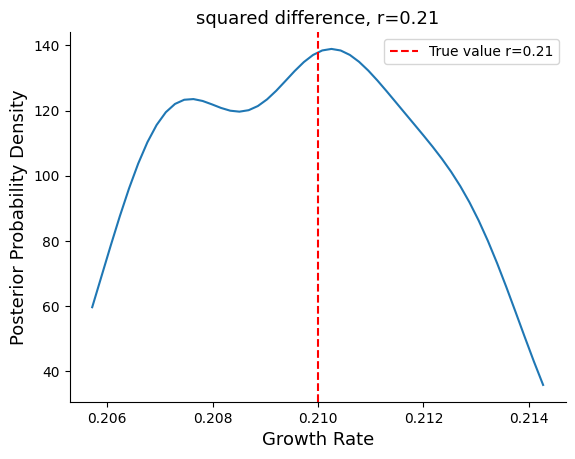

In [21]:
from pyabc.visualization import plot_kde_matrix, plot_kde_1d
df_g21_log, w_g21_log = history_g21_log.get_distribution(m=0)
ax = plot_kde_1d(10**df_g21_log, w_g21_log, x='s')
plt.axvline(x=0.21, color='red', linestyle='--', linewidth=1.5, label='True value r=0.21')
plt.title('squared difference, r=0.21', size=13)
plt.xlabel('Growth Rate', size=13)
plt.ylabel('Posterior Probability Density', size=13)
plt.legend()



plt.show()

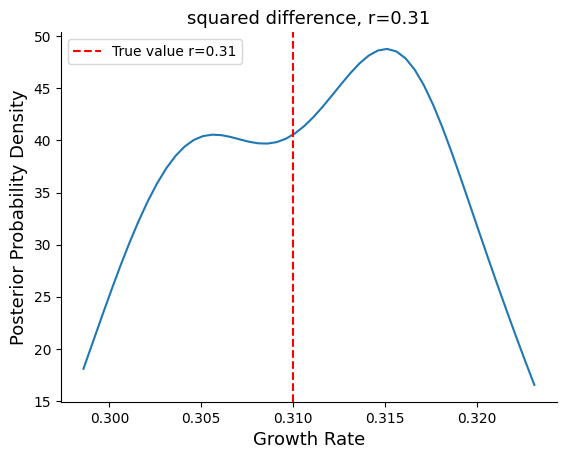

In [23]:
from pyabc.visualization import plot_kde_matrix, plot_kde_1d
df_g31_log, w_g31_log = history_g31_log.get_distribution(m=0)
ax = plot_kde_1d(10**df_g31_log, w_g31_log, x='s')
plt.axvline(x=0.31, color='red', linestyle='--', linewidth=1.5, label='True value r=0.31')
plt.title('squared difference, r=0.31', size=13)
plt.xlabel('Growth Rate', size=13)
plt.ylabel('Posterior Probability Density', size=13)
plt.legend()



plt.show()

In [7]:
observe_31 = simulate_fixvq_multi50({'s':0.31})

Testing parameter set: 0.31


In [ ]:
parameter_priors = Distribution(  
    s=RV("uniform", 0.30, 0.02) 
    )
parameter_priors
observed_data = observe_31

from scipy.stats import ks_2samp
def ks_distance1(simulation, observed_data):
    # Assuming simulation and observed_data are structured appropriately
    d, p_value = ks_2samp(simulation["survival_time"], observed_data["survival_time"])
    print(simulation["survival_time"], d, p_value)
    return d

abc = pyabc.ABCSMC(simulate_fixvq_multi,
             parameter_priors=parameter_priors,
             distance_function=ks_distance1,
             population_size=100,
             eps=pyabc.QuantileEpsilon(initial_epsilon=0.99, alpha=0.7))

db_path = "sqlite:///my_abc.db"
history_r31fix_1 = abc.new(db_path, observed_data)
history_r31fix_1 = abc.run(minimum_epsilon=0.7, max_nr_populations=5)

ABC.Sampler INFO: Parallelize sampling on 56 processes.
ABC.History INFO: Start <ABCSMC id=47, start_time=2024-08-05 15:33:35>
ABC INFO: t: 0, eps: 9.90000000e-01.


Testing parameter set: 0.3191638801172509
 Testing parameter set:0.3002449278730575
Testing parameter set: 0.30598448691187624
Testing parameter set: 0.30632736983895764
Testing parameter set: 0.3162059554158757 Testing parameter set:
0.31422826675610854
Testing parameter set: 0.31580683821746036
Testing parameter set: 0.3013052505932695
Testing parameter set: 0.3135729528155549
Testing parameter set: 0.31156435633825474
Testing parameter set: 0.30533832098814084
Testing parameter set: 0.31661390055698263
Testing parameter set: 0.31900455704206615
Testing parameter set:0.3167151356677078 
Testing parameter set: 0.30332772334073377Testing parameter set:
 0.3190909150323713
Testing parameter set: Testing parameter set:
 0.311492283017262560.3106157573332204
Testing parameter set: 0.30157603909182445Testing parameter set:
 0.3049268800004911
Testing parameter set: 0.30450473500687775
Testing parameter set: 0.31035511648379915
Testing parameter set: 0.30160417904037623
Testing parameter se

In [ ]:
from pyabc.visualization import plot_kde_matrix, plot_kde_1d
df_g31_log, w_g31_log = history_r31fix_1.get_distribution(m=0)
ax = plot_kde_1d(df_g31_log, w_g31_log, x='s')
plt.axvline(x=0.31, color='red', linestyle='--', linewidth=1.5, label='True value r=0.31')
ax.set_xlim([0.295, 0.325])
plt.title('ks test, r=0.31', size=13)
plt.xlabel('Growth Rate', size=13)
plt.ylabel('Posterior Probability Density', size=13)
plt.legend()



plt.show()